Провести дисперсионный анализ для определения того, есть ли различия среднего роста   
среди взрослых футболистов, хоккеистов и  штангистов. Даны значения роста в трех   
группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.  
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.  
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170. alpha = 0.05.


In [26]:
import numpy as np

football_p = np.array([173, 175, 180, 178, 177, 185, 183, 182], dtype=np.float64)
hockey_p = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180], dtype=np.float64)
weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170], dtype=np.float64)
k=3 
n_f = len(football_p)
n_h = len(hockey_p)
n_w = len(weightlifters)
n = n_f + n_h + n_w
all_p = np.concatenate([football_p, hockey_p, weightlifters])

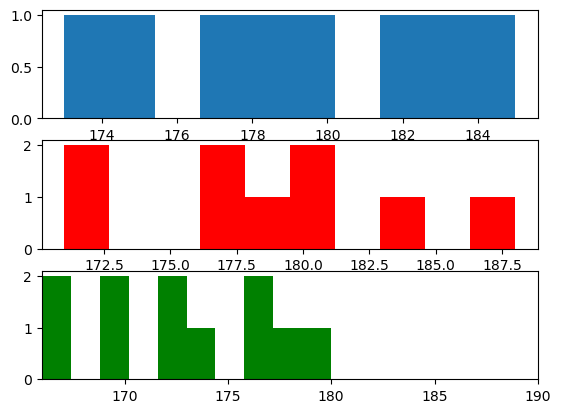

In [73]:
import matplotlib.pyplot as plt
import seaborn as sn

fig, ax = plt.subplots(nrows=3, ncols=1)
plt.xlim (166, 190)



ax1, ax2, ax3 = ax.flatten()
ax1.hist(football_p)
ax2.hist(hockey_p, color='red')
ax3.hist(weightlifters, color='green');

In [27]:
footbal_mean = football_p.mean()
hockey_mean = hockey_p.mean()
weightlifters_mean = weightlifters.mean()
all_mean = all_p.mean()

In [28]:
print(f'Общее среднее по всем выборкам - {round(all_mean,2)}, количество всех спортсменов - {n}\n\
Среднее по выборки футболистов - {round(footbal_mean,2)}, количество всех футболистов - {n_f}\n\
Среднее по выборки хокеистов - {round(hockey_mean,2)}, количество всех хокеистов  - {n_h}\n\
Среднее по выборки штангистов  - {round(weightlifters_mean,2)}, количество всех штангистов - {n_w}')

Общее среднее по всем выборкам - 176.46, количество всех спортсменов - 28
Среднее по выборки футболистов - 179.12, количество всех футболистов - 8
Среднее по выборки хокеистов - 178.67, количество всех хокеистов  - 9
Среднее по выборки штангистов  - 172.73, количество всех штангистов - 11


#### Найдим сумму квадратов отклонений средних по выборкам от общего среднего.
(межгруповая сумма квадратов она же факторная)

In [29]:
SS_group_mean_vs_general_mean = ((all_mean-hockey_mean)**2)*n_h + \
(all_mean-footbal_mean)**2*n_f +((all_mean-weightlifters_mean)**2)*n_w
round(SS_group_mean_vs_general_mean,2)

253.91

#### Найдем сумму квадратов отклонений всех наблюдений от общего среднего:
(общая сумма квадратов)

In [25]:
SS_general = np.sum((all_mean-all_p)**2)
round(SS_general,2)

830.96

#### Найдем  остаточную сумму квадратов отклонений
(сумма квадратов отклоний по выборкам внутри каждой выборки вокруг своего среднего выборки)

In [42]:
SS_tot_sample_inner = np.sum((footbal_mean-football_p)**2) + np.sum((hockey_mean-hockey_p)**2) \
+ np.sum((weightlifters_mean-weightlifters)**2)
round(SS_e,2)

577.06

Проверим равенство 
SS_tot_sample_inner + SS_group_mean_vs_general_mean = SS_general

In [43]:
round(SS_tot_sample_inner,5) + round(SS_group_mean_vs_general_mean,5) == round(SS_general,5)

True

In [44]:
SS_tot_sample_inner + SS_group_mean_vs_general_mean, SS_general

(830.964285714286, 830.9642857142854)

#### Найдем общую дисперсию


In [45]:
dispersion_general = SS_general /(n-1)
round(dispersion_general,2)

30.78

#### Найдем факторную/межгрупавую дисперсию

In [75]:
dispersion_group_mean_vs_general_mean = SS_group_mean_vs_general_mean/(k-1)
round(dispersion_group_mean_vs_general_mean,2)

126.95

#### Найдем остаточную дисперсию

In [76]:
dispersion_group_mean_vs_general_mean = SS_group_mean_vs_general_mean/(n-k)
dispersion_group_mean_vs_general_mean

23.08

In [74]:
F_h = dispersion_group_mean_vs_general_mean / dispersion_tot_sample_inner
round(F_h,2)

5.5

Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$ и двух степеней свободы: 

$df_{межгруповое} = k - 1 = 3 - 1 = 2$ и $df_{внутригруповое} = n - k = 28 - 3 = 3=25$.

F_табл = 4,24

Для данных значений F_табл=4.24. Так как F_пасчитаное (F_h) > F_табл, различие средних  в трех группах статистически значимо.

In [52]:
eta2 = SS_group_mean_vs_general_mean / SS_general
eta2

0.30555761769498

Значение  η2  больше 0.3 — значит, различие средних зарплат в трех группах является статистически значимым хотя не слишком сильно значимыми

### Вывод
Значение η2 а так же сравнение с F_h с распределение Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$
говорит что выборки отличаются друг от друга однако данный вывод не говорит о том отличается ли 1 от 2 или 2 от 1...